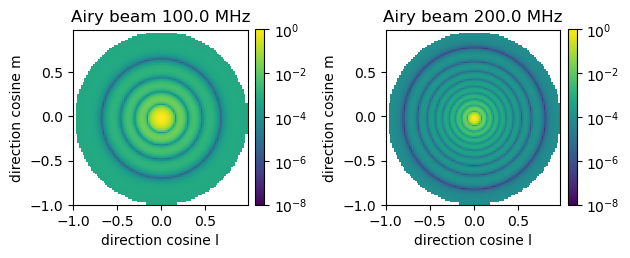

In [4]:
  >>> import matplotlib.pyplot as plt
  >>> import numpy as np
  >>> from matplotlib.colors import LogNorm

  >>> from pyuvdata import AiryBeam

  >>> # Create an AiryBeam with a diameter of 14.5 meters
  >>> airy_beam = AiryBeam(diameter=14.5, include_cross_pols=False)

  >>> # set up zenith angle, azimuth and frequency arrays to evaluate with
  >>> # make a regular grid in direction cosines for nice plots
  >>> n_vals = 100
  >>> zmax = np.radians(90)  # Degrees
  >>> axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
  >>> l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
  >>> radius = np.sqrt(l_arr**2 + m_arr**2)
  >>> za_array = radius * zmax
  >>> az_array = np.arctan2(m_arr, l_arr)

  >>> az_array = az_array.flatten()
  >>> za_array = za_array.flatten()

  >>> Nfreqs = 11
  >>> freqs = np.linspace(100, 200, 11) * 1e6

  >>> # find the values above the horizon so we don't evaluate beyond the horizon
  >>> above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
  >>> beam_vals = np.full((1, airy_beam.Npols, Nfreqs, n_vals * n_vals), np.inf, dtype=float)

  >>> beam_vals[:, :, :, above_hor] = airy_beam.power_eval(
  ...     az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
  ... )

  >>> beam_vals = np.reshape(beam_vals, (1, airy_beam.Npols, Nfreqs, n_vals, n_vals))

  >>> fig, ax = plt.subplots(1, 2)
  >>> bp_low = ax[0].imshow(
  ...   beam_vals[0,0,0],
  ...   norm=LogNorm(vmin = 1e-8, vmax =1),
  ...   extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
  ... )
  >>> _ = ax[0].set_title(f"Airy beam {freqs[0]*1e-6} MHz")
  >>> _ = ax[0].set_xlabel("direction cosine l")
  >>> _ = ax[0].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(bp_low, ax=ax[0], fraction=0.046, pad=0.04)

  >>> bp_high = ax[1].imshow(
  ...   beam_vals[0,0,-1],
  ...   norm=LogNorm(vmin = 1e-8, vmax =1),
  ...   extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
  ... )
  >>> _ = ax[1].set_title(f"Airy beam {freqs[-1]*1e-6} MHz")
  >>> _ = ax[1].set_xlabel("direction cosine l")
  >>> _ = ax[1].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(bp_high, ax=ax[1], fraction=0.046, pad=0.04)
  >>> fig.tight_layout()


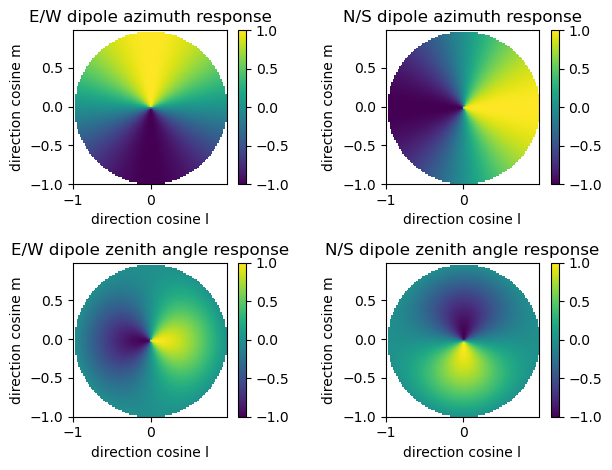

In [13]:
  >>> import matplotlib.pyplot as plt
  >>> import numpy as np

  >>> from pyuvdata import ShortDipoleBeam

  >>> # Create an ShortDipoleBeam
  >>> dipole_beam = ShortDipoleBeam()

  >>> # set up zenith angle, azimuth and frequency arrays to evaluate with
  >>> # make a regular grid in direction cosines for nice plots
  >>> n_vals = 100
  >>> zmax = np.radians(90)  # Degrees
  >>> axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
  >>> l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
  >>> radius = np.sqrt(l_arr**2 + m_arr**2)
  >>> za_array = radius * zmax
  >>> az_array = np.arctan2(m_arr, l_arr)

  >>> az_array = az_array.flatten()
  >>> za_array = za_array.flatten()

  >>> Nfreqs = 11
  >>> freqs = np.linspace(100, 200, 11) * 1e8

  >>> # find the values above the horizon so we don't evaluate beyond the horizon
  >>> above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
  >>> beam_vals = np.full((dipole_beam.Naxes_vec, dipole_beam.Nfeeds, Nfreqs, n_vals * n_vals), np.inf, dtype=complex)

  >>> beam_vals[:, :, :, above_hor] = dipole_beam.efield_eval(
  ...     az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
  ... )

  >>> beam_vals = np.reshape(beam_vals, (dipole_beam.Naxes_vec, dipole_beam.Nfeeds, Nfreqs, n_vals, n_vals))

  >>> fig, ax = plt.subplots(2, 2)

  >>> be00 = ax[0,0].imshow(beam_vals[0,0,0].real, extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[0,0].set_title("E/W dipole azimuth response")
  >>> _ = ax[0,0].set_xlabel("direction cosine l")
  >>> _ = ax[0,0].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[0,0])

  >>> be10 = ax[1,0].imshow(beam_vals[1,0,0].real, extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[1,0].set_title("E/W dipole zenith angle response")
  >>> _ = ax[1,0].set_xlabel("direction cosine l")
  >>> _ = ax[1,0].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[1,0])

  >>> be01 = ax[0,1].imshow(beam_vals[0,1,0].real, extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[0,1].set_title("N/S dipole azimuth response")
  >>> _ = ax[0,1].set_xlabel("direction cosine l")
  >>> _ = ax[0,1].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[0,1])

  >>> be11 = ax[1,1].imshow(beam_vals[1,1,0].real, extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[1,1].set_title("N/S dipole zenith angle response")
  >>> _ = ax[1,1].set_xlabel("direction cosine l")
  >>> _ = ax[1,1].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[1,1])

  >>> fig.tight_layout()